# 图像缩放

# OpenCV 图像缩放 (Image Resizing) 知识点详解

本笔记基于 `09_图像缩放.ipynb` 文件，详细讲解了如何使用 OpenCV 对图像进行尺寸调整（缩放）。

## 1. 核心函数

OpenCV 提供了一个非常通用的函数来改变图像大小：

* **函数**：`cv2.resize(src, dsize, fx=0, fy=0, interpolation=cv2.INTER_LINEAR)`
* **参数解释**：
    * `src`: 输入图像。
    * `dsize`: 目标图像的大小，格式为 `(width, height)`。
    * `fx`: x 轴方向的缩放比例（倍数）。
    * `fy`: y 轴方向的缩放比例（倍数）。
    * `interpolation`: 插值方法（默认为线性插值，本文件主要关注前几个参数）。

---

## 2. 两种缩放方式

### 方式一：按比例缩放 (Scale by Ratio)

这种方式不需要指定具体的像素大小，而是指定 **“长宽各变为原来的多少倍”**。

* **关键点**：
    1.  将 `dsize` 设置为 `(0, 0)` 或 `None`，告诉函数我们不指定具体像素值。
    2.  通过 `fx` 和 `fy` 参数来控制缩放倍数。

* **代码示例**：
    ```python
    import cv2
    
    img = cv2.imread('cat.jpg')
    
    # 例子 1：横向拉伸 3 倍，纵向不变
    # fx=3 (宽变3倍), fy=1 (高不变)
    res1 = cv2.resize(img, (0, 0), fx=3, fy=1)
    
    # 例子 2：横向不变，纵向拉伸 3 倍
    # fx=1 (宽不变), fy=3 (高变3倍)
    res2 = cv2.resize(img, (0, 0), fx=1, fy=3)
    ```

* **生活例子**：想象你手里的橡皮筋。
    * `fx=3, fy=1` 就像把橡皮筋左右拉长。
    * `fx=1, fy=3` 就像把橡皮筋上下拉长。

### 方式二：指定数值大小缩放 (Scale by Dimensions)

这种方式是直接指定图像缩放后的 **具体宽高像素值**。

* **关键点**：
    * 直接在 `dsize` 参数位置填入 `(宽, 高)`。
    * 此时 `fx` 和 `fy` 通常不需要设置（默认为 0）。

* **代码示例**：
    ```python
    # 将图片强制缩放为 200x200 像素
    # 参数顺序是 (宽度, 高度)
    res3 = cv2.resize(img, (200, 200)) 
    ```

* **生活例子**：证件照裁剪。不管你原图多大，系统要求必须是 200x200，你就直接把图片“压”进这个尺寸的框里。

---

## 3. 容易混淆的“坑” (重要！)

在 OpenCV 和 NumPy 中，表示尺寸的顺序是不一样的，这是新手最容易犯错的地方。

| 属性/方法 | 顺序 | 说明 |
| :--- | :--- | :--- |
| **`img.shape`** | `(高度, 宽度, 通道数)` | NumPy 数组的属性，看作矩阵的 (行数, 列数)。 |
| **`cv2.resize()`** | `(宽度, 高度)` | OpenCV 函数参数，看作坐标系的 (x, y)。 |

* **演示**：
    假设 `img.shape` 打印出来是 `(414, 500, 3)`。
    * 意思是：高 414，宽 500。
    * 如果你想把图片缩小一半，写 `cv2.resize` 时：
        * **正确写法**：`cv2.resize(img, (250, 207))` -> `(宽/2, 高/2)`
        * **错误写法**：`cv2.resize(img, (207, 250))` -> 这会导致图片变形（横竖搞反）。

# 1. 倍数缩放

In [1]:
import cv2 #opencv的缩写为cv2
import matplotlib.pyplot as plt # matplotlib库用于绘图展示
import numpy as np   # numpy数值计算工具包

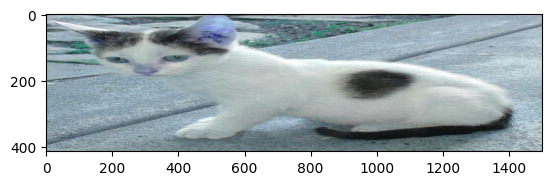

In [2]:
img = cv2.imread('01_Picture/01_cat.jpg') 
res = cv2.resize(img,(0,0),fx=3,fy=1) # (0,0)表示不确定具体值，fx=3 相当于行像素 x 乘 3，fy=1 相当于 y 乘 1   
plt.imshow(res)

# 2. 等比例缩放

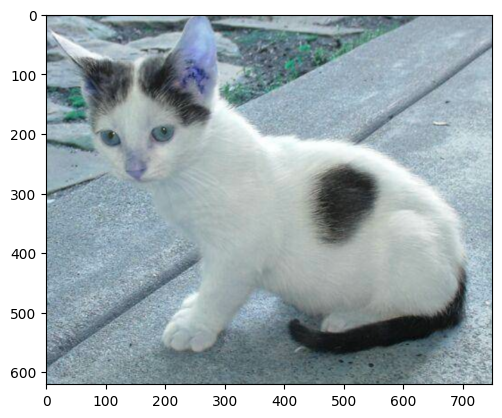

In [3]:
res = cv2.resize(img,(0,0),fx=1.5,fy=1.5) # 同比例放缩
plt.imshow(res)